## Step 1: Reading and understanding data

In [529]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [530]:
# Read the data from csv file

df = pd.read_csv('day.csv')

In [531]:
# Take a look at the values

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [532]:
# checking the shape of dataframe

df.shape

(730, 16)

In [533]:
# describing the columns of dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [534]:
# get the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [535]:
# checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [536]:
# making a copy of the original data before making changes to it

bike_sharing = df.copy()

# Checking for duplicates and dropping the entire duplicate row if any

bike_sharing.drop_duplicates(subset=None, inplace=True)

In [537]:
# Rechecking the size to see if any duplicates were found

bike_sharing.shape

(730, 16)

In [538]:
# Data quality check using value_counts

for col in bike_sharing:
    print(bike_sharing[col].value_counts(ascending=False), '\n\n\n')

1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64 



01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 



3    188
2    184
1    180
4    178
Name: season, dtype: int64 



0    365
1    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 



1    499
0    231
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.9894

### Data Cleaning



In [539]:
# On analysing the data, we already have month and year, 
# so creating a column day and dropping dteday

bike_sharing['dteday'] =  pd.to_datetime(df['dteday'], format='%d-%m-%Y')

bike_sharing['day'] = bike_sharing.dteday.dt.day
bike_sharing = bike_sharing.drop(['dteday'], axis=1)

In [540]:
bike_sharing.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


In [541]:
# On further analysis 'instant', 'casual', 'registered' can be dropped
# 'instant' is just the index of the rows
# 'cnt' has the sum of 'casual' and 'registered' as it does not matter the type of registration

bike_sharing = bike_sharing.drop(['instant','casual','registered'], axis=1)

In [542]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


In [543]:
bike_sharing.shape

(730, 13)

### Changing Categorical variables into dummy variables.


In [544]:
# Mapping column names to appropriate names before creating dummy variables.

bike_sharing.season = bike_sharing.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_sharing.month = bike_sharing.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_sharing.weekday = bike_sharing.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_sharing.weathersit = bike_sharing.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [545]:
# Creating dummy variables for 'mnth', 'weekday', 'weathersit' , 'season'.

months_dv=pd.get_dummies(bike_sharing.month,drop_first=True)
weekdays_dv=pd.get_dummies(bike_sharing.weekday,drop_first=True)
weathersit_dv=pd.get_dummies(bike_sharing.weathersit,drop_first=True)
seasons_dv=pd.get_dummies(bike_sharing.season,drop_first=True)

In [546]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,0,1,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,0,1,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,0,1,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,0,1,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,0,1,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,5


In [547]:
# Merging  the dataframe, with the dummy variable dataset. 

bike_sharing_new = pd.concat([bike_sharing,months_dv,weekdays_dv,weathersit_dv,seasons_dv],axis=1)

In [548]:
bike_sharing_new.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day', 'aug',
       'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct', 'sep',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'Light_snowrain', 'Misty',
       'spring', 'summer', 'winter'],
      dtype='object')

In [549]:
bike_sharing_new.shape

(730, 35)

## Step 2: Splitting data into training and test

In [550]:
np.random.seed(0)
bike_sharing_train, bike_sharing_test = train_test_split(bike_sharing_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [551]:
bike_sharing_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
483,summer,1,4,0,sun,0,Clear,18.791653,22.50605,58.7083,...,0,1,0,0,0,0,0,0,1,0
650,winter,1,10,0,sat,0,Clear,16.126653,19.56980,49.4583,...,1,0,0,0,0,0,0,0,0,1
212,fall,0,8,0,mon,1,Clear,31.638347,35.16460,55.0833,...,0,0,0,0,0,0,0,0,0,0
714,winter,1,12,0,sun,0,Misty,14.862500,18.49690,83.8750,...,0,1,0,0,0,0,1,0,0,1
8,spring,0,1,0,sun,0,Clear,5.671653,5.80875,43.4167,...,0,1,0,0,0,0,0,1,0,0


In [552]:
bike_sharing_train.shape

(510, 35)

In [553]:
bike_sharing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          510 non-null    object 
 1   yr              510 non-null    int64  
 2   mnth            510 non-null    int64  
 3   holiday         510 non-null    int64  
 4   weekday         510 non-null    object 
 5   workingday      510 non-null    int64  
 6   weathersit      510 non-null    object 
 7   temp            510 non-null    float64
 8   atemp           510 non-null    float64
 9   hum             510 non-null    float64
 10  windspeed       510 non-null    float64
 11  cnt             510 non-null    int64  
 12  day             510 non-null    int64  
 13  aug             510 non-null    uint8  
 14  dec             510 non-null    uint8  
 15  feb             510 non-null    uint8  
 16  jan             510 non-null    uint8  
 17  july            510 non-null    u

In [554]:
bike_sharing_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
22,spring,0,1,0,sun,0,Clear,3.957390,4.941955,43.6522,...,0,1,0,0,0,0,0,1,0,0
468,summer,1,4,0,sat,0,Clear,20.295000,24.399800,50.2917,...,1,0,0,0,0,0,0,0,1,0
553,fall,1,7,0,sun,0,Clear,33.722500,39.519800,57.3750,...,0,1,0,0,0,0,0,0,0,0
504,summer,1,5,0,sun,0,Clear,25.454153,29.198350,53.0417,...,0,1,0,0,0,0,0,0,1,0
353,winter,0,12,0,tue,1,Misty,15.819153,19.822700,59.5417,...,0,0,0,1,0,0,1,0,0,1


In [555]:
bike_sharing_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          219 non-null    object 
 1   yr              219 non-null    int64  
 2   mnth            219 non-null    int64  
 3   holiday         219 non-null    int64  
 4   weekday         219 non-null    object 
 5   workingday      219 non-null    int64  
 6   weathersit      219 non-null    object 
 7   temp            219 non-null    float64
 8   atemp           219 non-null    float64
 9   hum             219 non-null    float64
 10  windspeed       219 non-null    float64
 11  cnt             219 non-null    int64  
 12  day             219 non-null    int64  
 13  aug             219 non-null    uint8  
 14  dec             219 non-null    uint8  
 15  feb             219 non-null    uint8  
 16  jan             219 non-null    uint8  
 17  july            219 non-null    ui

In [556]:
bike_sharing_test.shape

(219, 35)

## Step 3: Visualizing the data

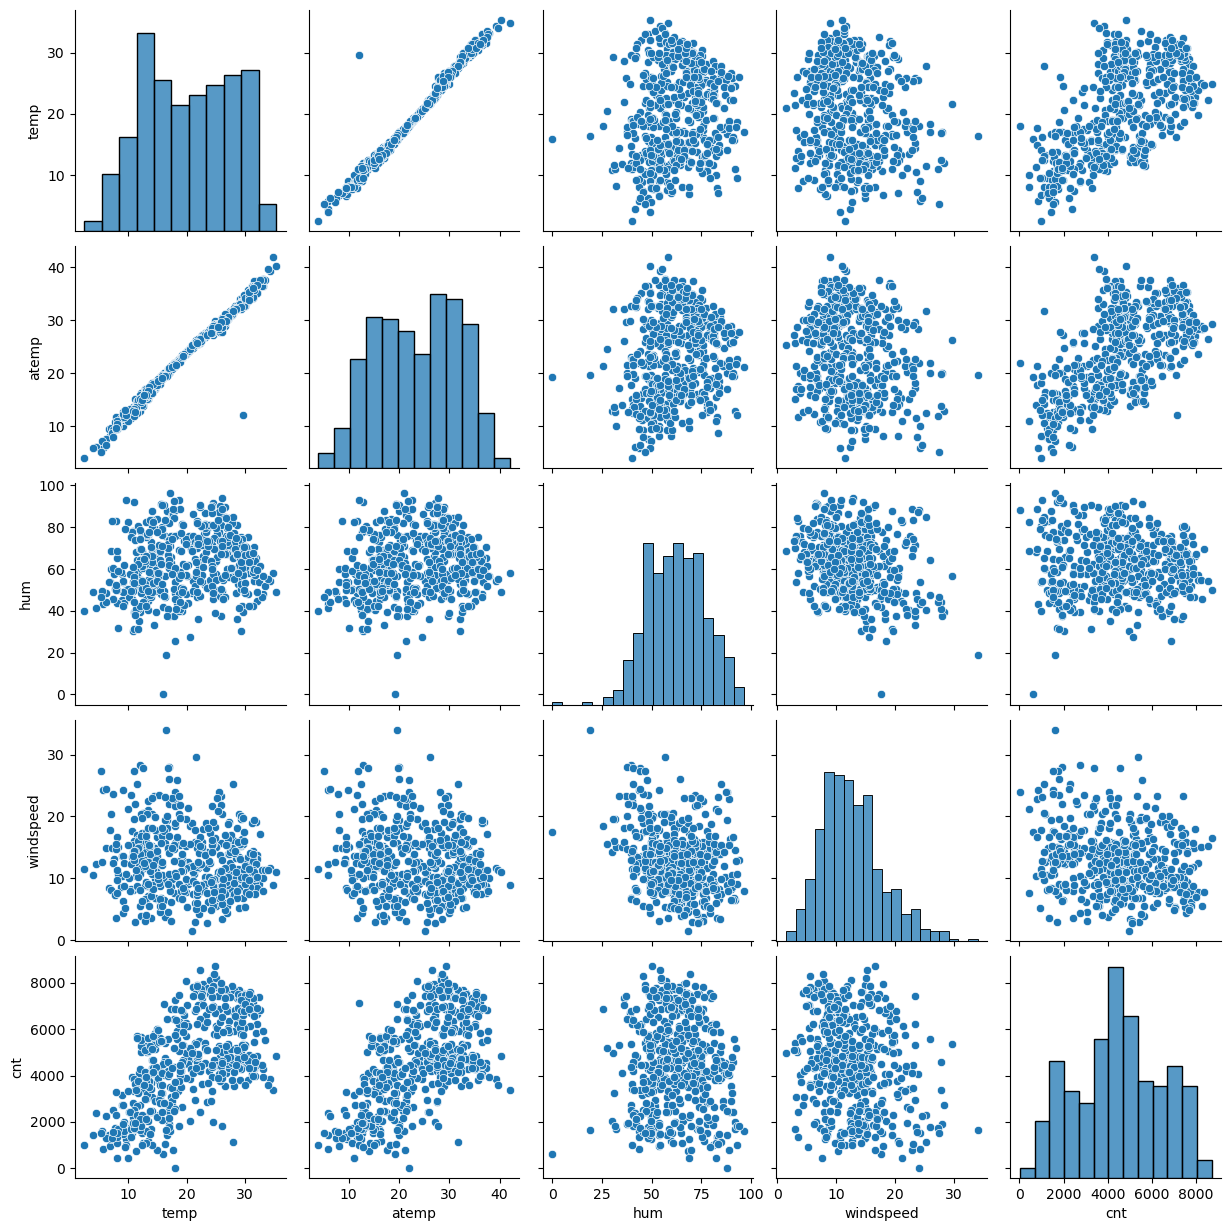

In [557]:
# visualizing only continous data

bike_sharing_cont = bike_sharing_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_sharing_cont)
plt.show()

Above pairplot shows a linear relationship between 'temp' and 'atemp', 'temp' and 'cnt' and 'cnt' and 'atemp'

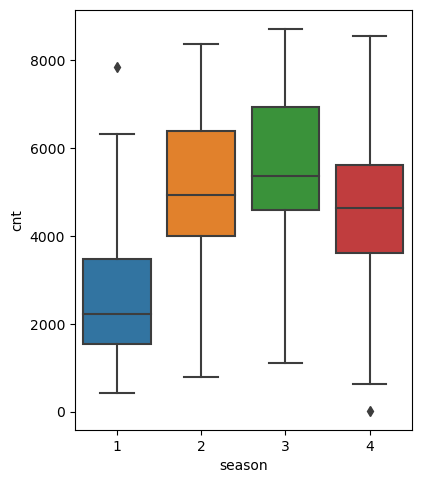

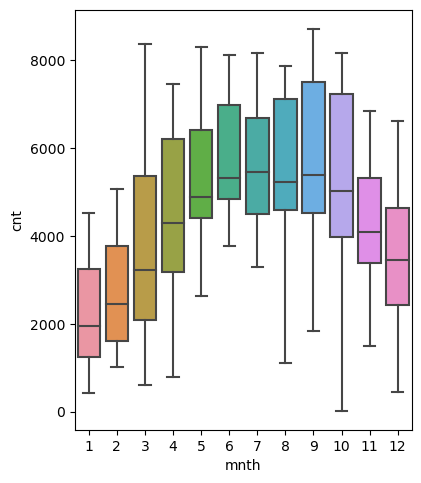

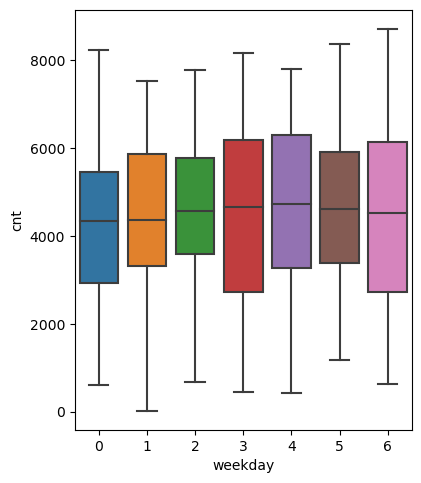

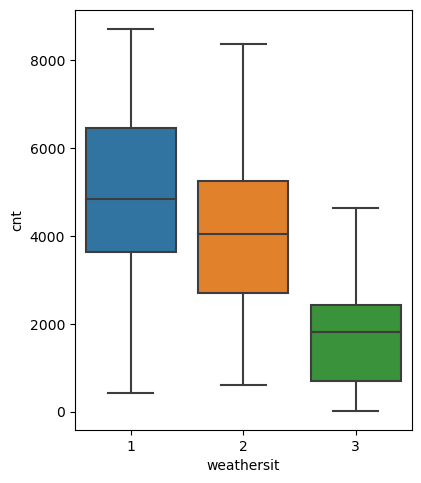

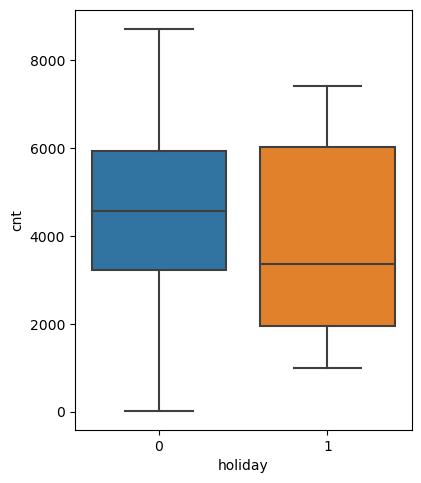

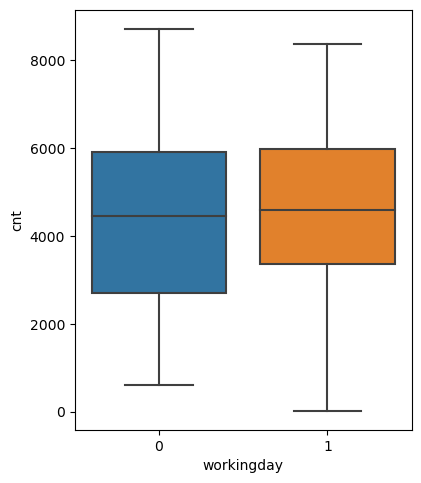

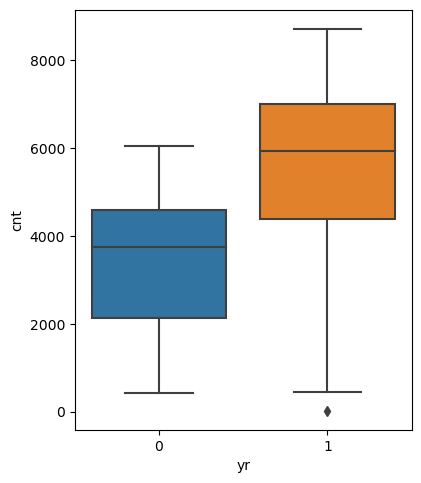

In [558]:
# Analysing/visualizing the categorical columns against target variable 'cnt'

bike_sharing_cat = ['season', 'mnth', 'weekday','weathersit', 'holiday', 'workingday', 'yr']

for cat in bike_sharing_cat:
    plt.figure(figsize=(20, 12))
    i = 1
    plt.subplot(2,4,i)
    sns.boxplot(x = cat, y = 'cnt', data = df)
    i = i+1
    plt.show()
    

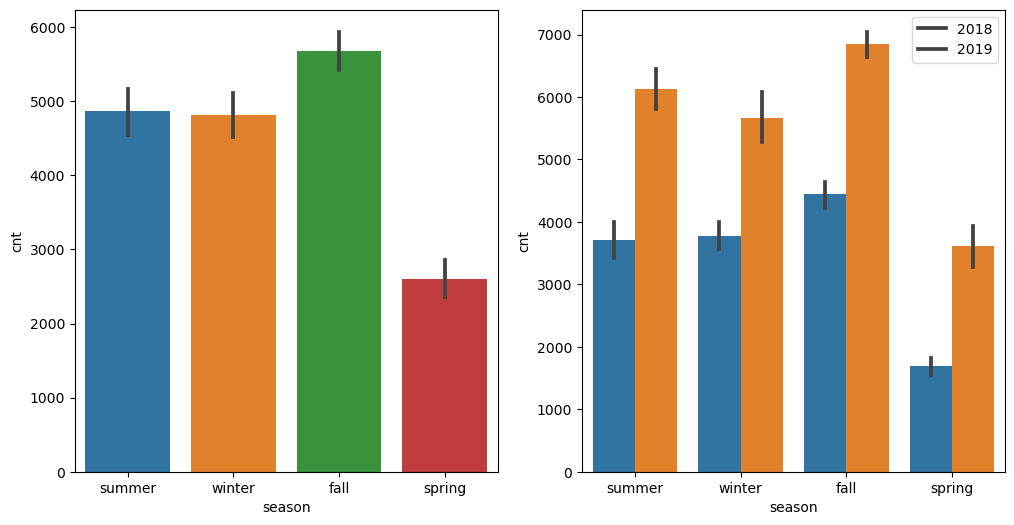

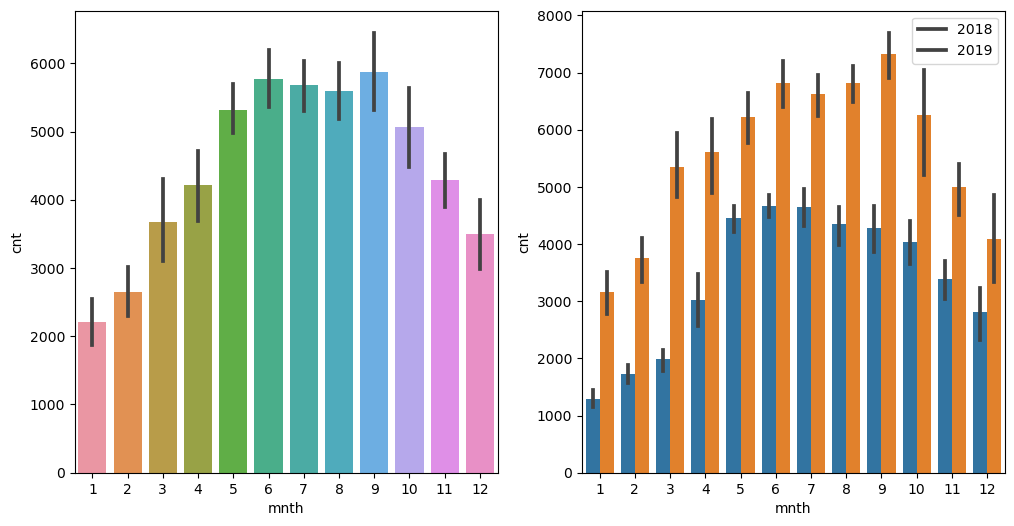

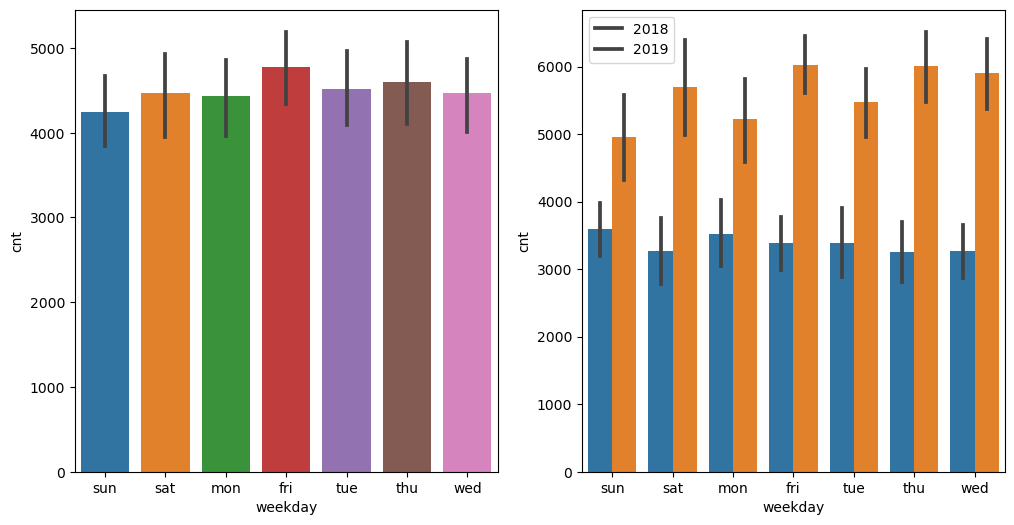

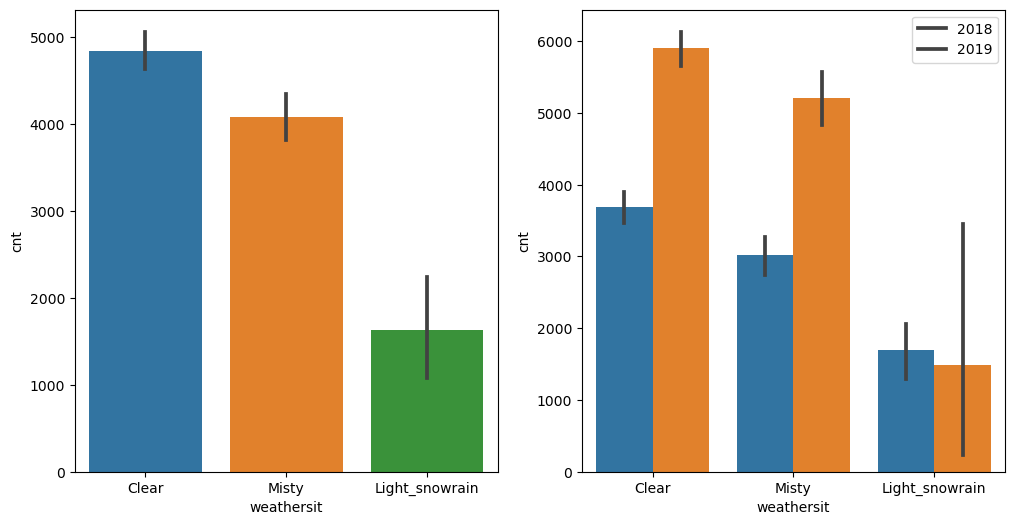

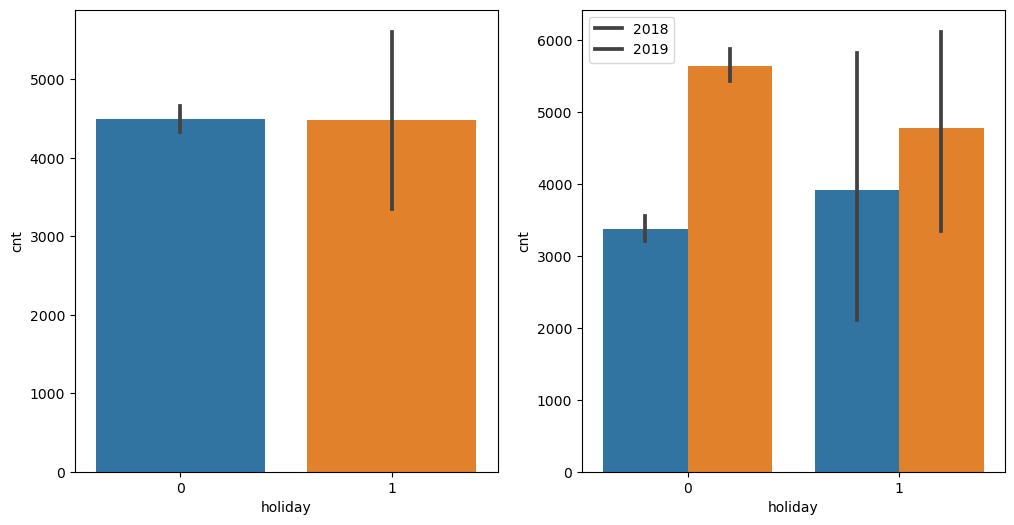

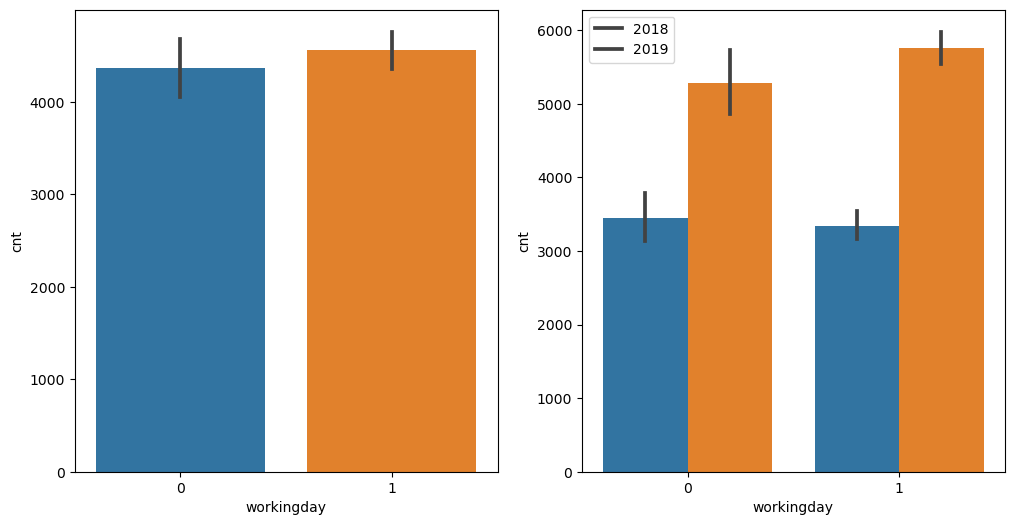

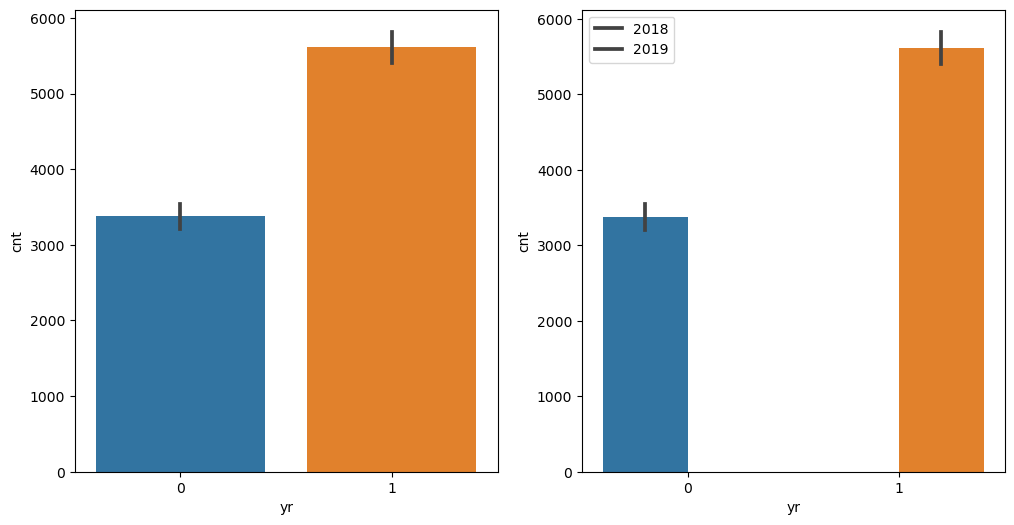

In [559]:
# Creating bar plots to check the categorical variables against the year 2018 and 2019

for cat in bike_sharing_cat:
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x = cat,y = "cnt",data = bike_sharing_train)
    plt.subplot(1,2,2)
    sns.barplot(x = cat,y = 'cnt',data=bike_sharing_train, hue='yr')
    plt.legend(labels=['2018', '2019'])
    plt.show()

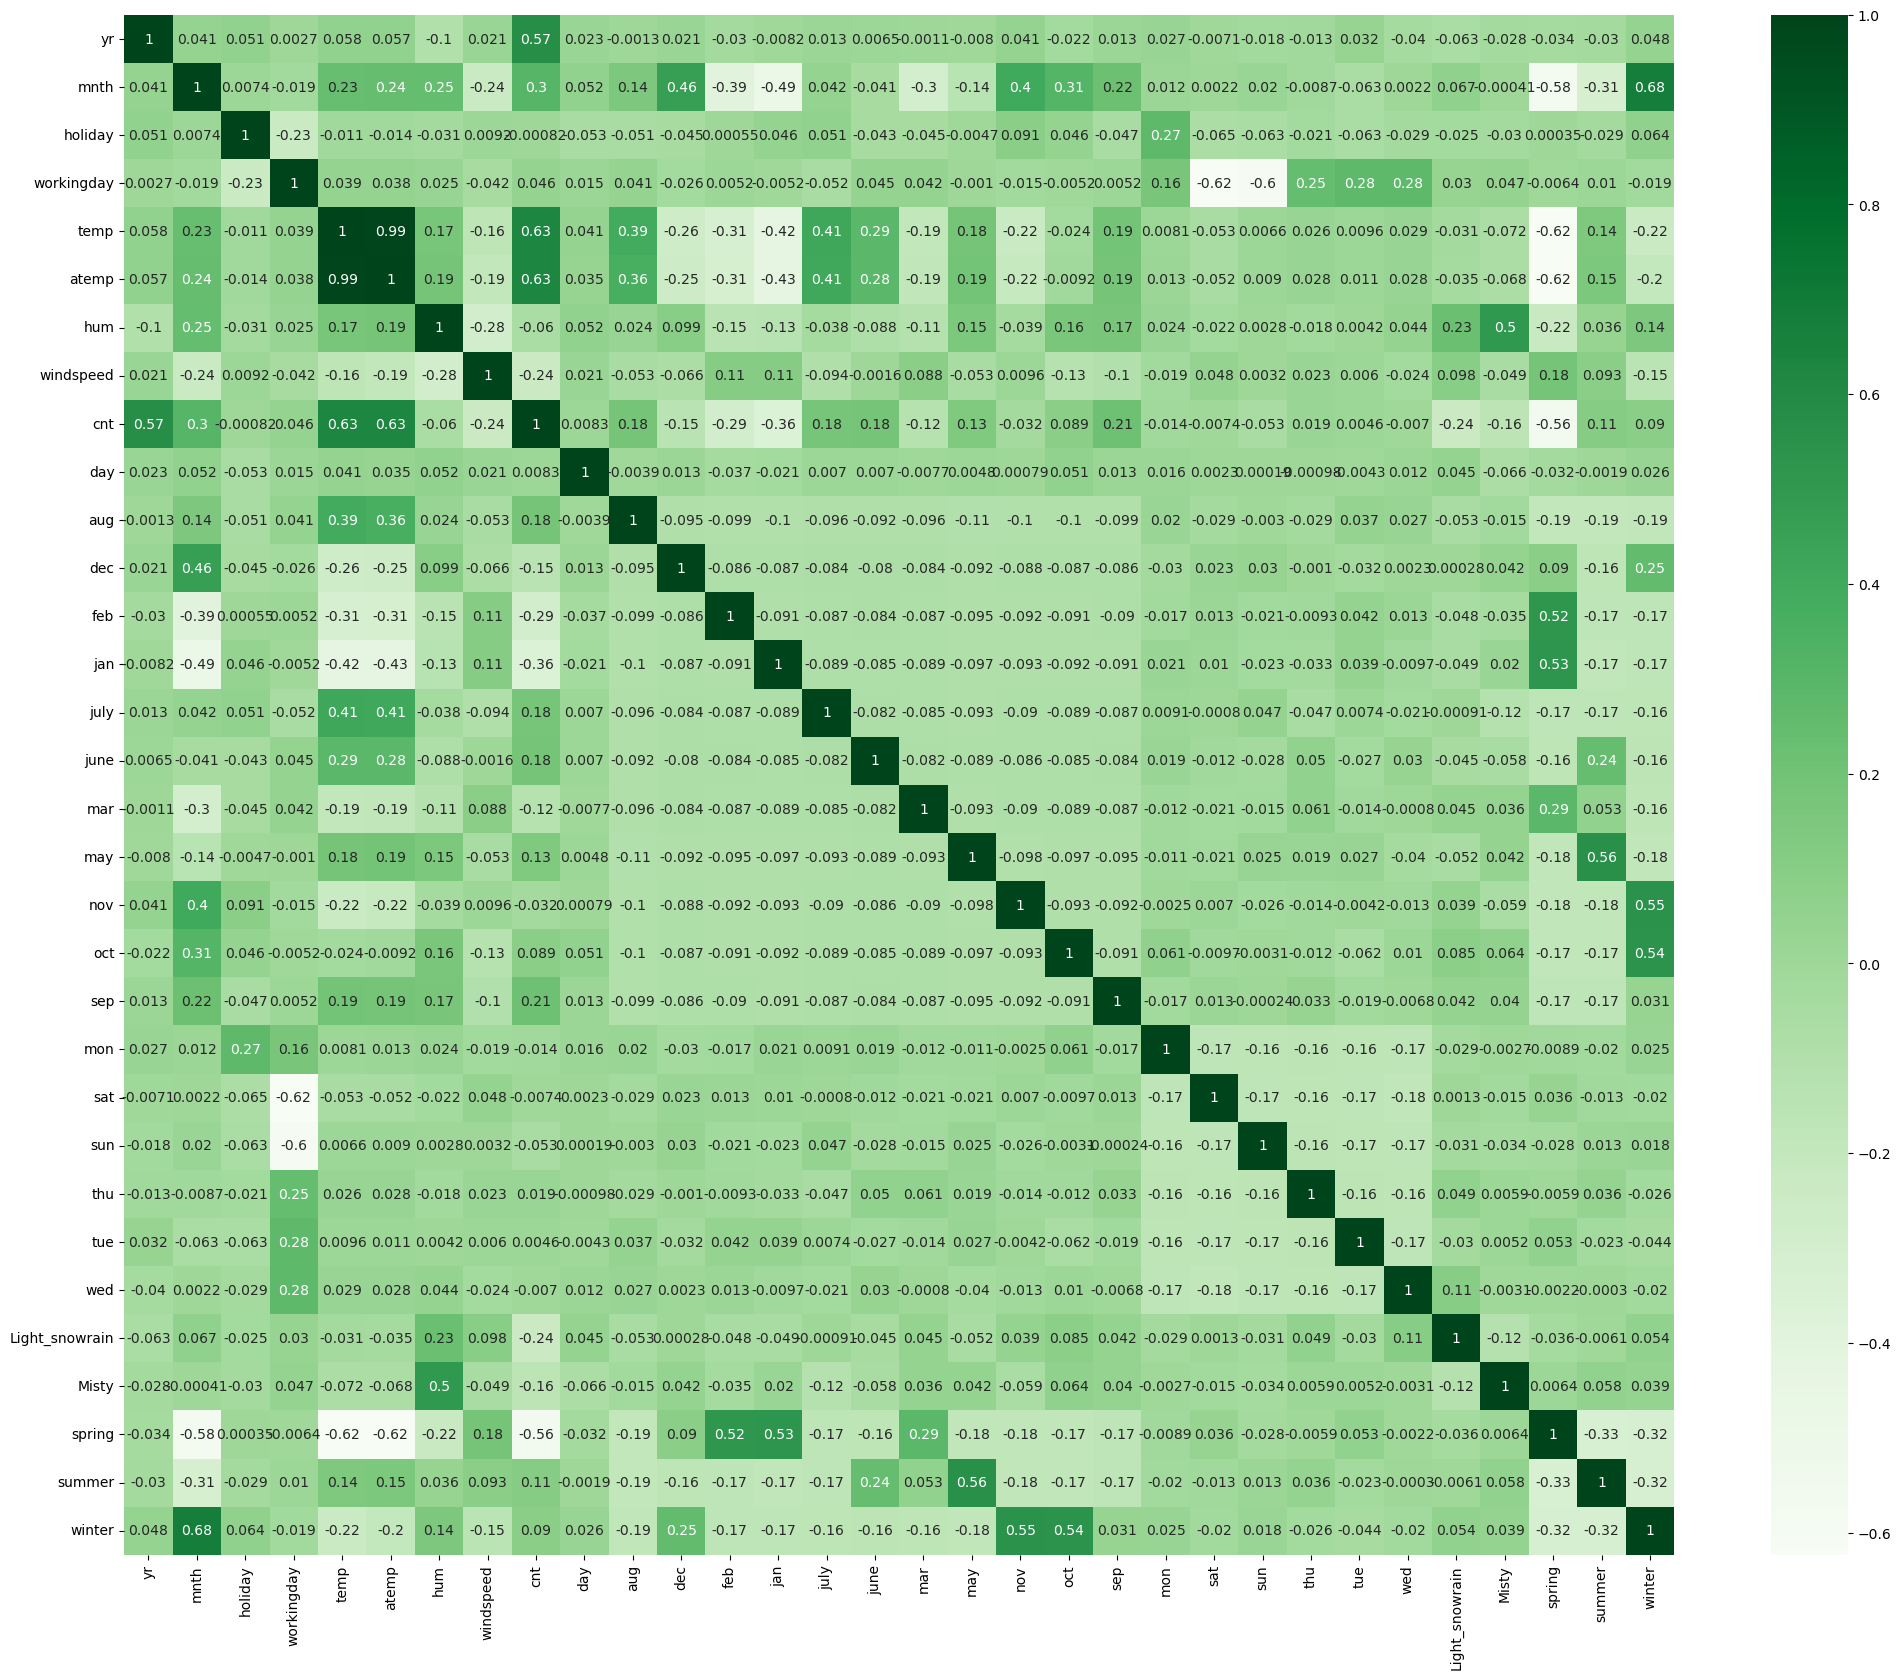

In [560]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,20))
sns.heatmap(bike_sharing_train.corr(), annot = True, cmap="Greens")
plt.show()

In [561]:
# Removing the variables with which dummy variables were created for both training and test data

bike_sharing_train = bike_sharing_train.drop(['season','weathersit','mnth','weekday' ], axis=1)
bike_sharing_test = bike_sharing_test.drop(['season','weathersit','mnth','weekday' ], axis=1)

In [562]:
bike_sharing_train.columns
bike_sharing_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'day', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may',
       'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

### Scaling variables

In [563]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [564]:
bike_sharing_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,aug,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,29,0,...,0,1,0,0,0,0,0,0,1,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,13,0,...,1,0,0,0,0,0,0,0,0,1
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,1,1,...,0,0,0,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,16,0,...,0,1,0,0,0,0,1,0,0,1
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,9,0,...,0,1,0,0,0,0,0,1,0,0


In [565]:
bike_sharing_train[bike_sharing_cont.columns]

,temp,atemp,hum,windspeed,cnt
483,18.791653,22.50605,58.7083,7.832836,6304
650,16.126653,19.56980,49.4583,9.791514,7109
212,31.638347,35.16460,55.0833,10.500039,4266
714,14.862500,18.49690,83.8750,6.749714,3786
8,5.671653,5.80875,43.4167,24.250650,822
...,...,...,...,...,...
467,18.142500,21.59040,40.8333,10.416557,6398
444,21.798347,25.66290,82.1250,6.000406,6230
46,13.048701,15.81000,42.3478,16.869997,2115
374,12.656536,15.94130,64.6522,12.565984,3598


In [566]:
# Apply scaler() to all the continous variables

bike_sharing_train[bike_sharing_cont.columns] = scaler.fit_transform(bike_sharing_train[bike_sharing_cont.columns])

In [567]:
bike_sharing_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,aug,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,29,0,...,0,1,0,0,0,0,0,0,1,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,13,0,...,1,0,0,0,0,0,0,0,0,1
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,1,1,...,0,0,0,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,16,0,...,0,1,0,0,0,0,1,0,0,1
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,9,0,...,0,1,0,0,0,0,0,1,0,0


In [568]:
bike_sharing_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,aug,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,15.886275,0.098039,...,0.150980,0.143137,0.129412,0.141176,0.150980,0.025490,0.341176,0.24902,0.247059,0.241176
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,8.920012,0.297660,...,0.358381,0.350557,0.335985,0.348545,0.358381,0.157763,0.474570,0.43287,0.431725,0.428217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,16.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,24.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Step 4: Building a model

In [569]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [570]:
# Building the Linear Model

y_train = bike_sharing_train.pop('cnt')
X_train = bike_sharing_train

### Recursive Feature Elimination

In [571]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [572]:
# List of top 15 variables selected by RFE

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day', False, 15),
 ('aug', False, 9),
 ('dec', False, 4),
 ('feb', False, 8),
 ('jan', False, 7),
 ('july', True, 1),
 ('june', False, 13),
 ('mar', True, 1),
 ('may', False, 5),
 ('nov', False, 3),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 6),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 14),
 ('tue', False, 10),
 ('wed', False, 16),
 ('Light_snowrain', True, 1),
 ('Misty', False, 2),
 ('spring', True, 1),
 ('summer', False, 11),
 ('winter', True, 1)]

In [573]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'july', 'mar', 'sep', 'sat', 'sun', 'Light_snowrain', 'spring',
       'winter'],
      dtype='object')

In [574]:
X_train.columns[~rfe.support_]

Index(['day', 'aug', 'dec', 'feb', 'jan', 'june', 'may', 'nov', 'oct', 'mon',
       'thu', 'tue', 'wed', 'Misty', 'summer'],
      dtype='object')

In [575]:
# Create a new dataframe with only the RFE selected variables

X_train_rfe = X_train[col]

In [576]:
X_train_rfe

,yr,holiday,workingday,temp,atemp,hum,windspeed,july,mar,sep,sat,sun,Light_snowrain,spring,winter
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0,0,0,0,1,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0,0,0,1,0,0,0,1
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0,0,0,0,1,0,0,1
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1,0,1,0.477697,0.463017,0.424242,0.274350,0,0,0,0,0,0,0,0
444,1,0,1,0.588804,0.569931,0.853247,0.138467,0,1,0,0,0,0,0,0
46,0,0,1,0.322889,0.311266,0.439977,0.472919,0,0,0,0,0,0,1,0
374,1,0,1,0.310971,0.314713,0.671711,0.340487,0,0,0,0,0,0,1,0


### Calculate VIF

In [577]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [578]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,temp,53.37
4,atemp,51.69
2,workingday,41.54
10,sat,9.82
11,sun,9.46
13,spring,2.65
1,holiday,2.44
14,winter,1.78
7,july,1.31
5,hum,1.27


In [579]:
import statsmodels.api as sm

# Add a constant
X_train_lm_1 = sm.add_constant(X_train_rfe)

# Create a 1st fitted model
lr_1 = sm.OLS(y_train, X_train_lm_1).fit()

In [580]:
lr_1.params

const             0.297585
yr                0.226167
holiday           0.047875
workingday        0.089251
temp              0.344771
atemp             0.169790
hum              -0.266206
windspeed        -0.198598
july             -0.052780
mar               0.045627
sep               0.068353
sat               0.105309
sun               0.055150
Light_snowrain   -0.224711
spring           -0.115511
winter            0.061016
dtype: float64

In [581]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.3
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          5.41e-181
Time:                        21:39:21   Log-Likelihood:                 493.12
No. Observations:                 510   AIC:                            -956.2
Df Residuals:                     495   BIC:                            -892.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2976      0.026     11.333      0.000       0.246       0.349
yr                 0.2262      0.008     26.919      0.000       0.210       0.243
holiday            0.0479      0.023      2.084      0.038       0.003       0.093
workingday         0.0893      0.010      9.097      0.000       0.070       0.109
temp               0.3448      0.133      2.598      0.010       0.084       0.605
atemp              0.1698      0.139      1.219      0.224      -0.104       0.444
hum               -0.2662      0.031     -8.537      0.000      -0.327      -0.205
windspeed         -0.1986      0.028     -6.977      0.000      -0.255      -0.143
july              -0.0528      0.018     -3.002      0.003      -0.087      -0.018
mar                0.0456      0.016      2.804      0.005       0.014       0.078
sep                0.0684      0.016      4.323      0.000       0.037       0.099
sat                0.1053      0.012      8.727      0.000       0.082       0.129
sun                0.0551      0.012      4.482      0.000       0.031       0.079
Light_snowrain    -0.2247      0.028     -8.124      0.000      -0.279      -0.170
spring            -0.1155      0.016     -7.424      0.000      -0.146      -0.085
winter             0.0610      0.013      4.731      0.000       0.036       0.086
==============================================================================
Omnibus:                       74.112   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.679
Skew:                          -0.829   Prob(JB):                     3.83e-32
Kurtosis:                       5.014   Cond. No.                     2.75e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.07e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [582]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [583]:
# Calculate VIF

calculateVIF(X_train_new)

,Features,VIF
2,workingday,41.24
9,sat,9.74
10,sun,9.39
3,temp,2.93
12,spring,2.65
1,holiday,2.44
13,winter,1.77
6,july,1.31
4,hum,1.27
5,windspeed,1.18


In [584]:
# Add a constant
X_train_lm_2 = sm.add_constant(X_train_new)

# Create a 1st fitted model
lr_2 = sm.OLS(y_train, X_train_lm_2).fit()

In [585]:
lr_2.params

const             0.300155
yr                0.226160
holiday           0.047729
workingday        0.089999
temp              0.501987
hum              -0.264475
windspeed        -0.204769
july             -0.052873
mar               0.046418
sep               0.067340
sat               0.106292
sun               0.056134
Light_snowrain   -0.225742
spring           -0.115806
winter            0.062235
dtype: float64

In [586]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.4
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          8.09e-182
Time:                        21:39:21   Log-Likelihood:                 492.36
No. Observations:                 510   AIC:                            -956.7
Df Residuals:                     496   BIC:                            -897.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3002      0.026     11.462      0.000       0.249       0.352
yr                 0.2262      0.008     26.905      0.000       0.210       0.243
holiday            0.0477      0.023      2.076      0.038       0.003       0.093
workingday         0.0900      0.010      9.187      0.000       0.071       0.109
temp               0.5020      0.031     16.130      0.000       0.441       0.563
hum               -0.2645      0.031     -8.486      0.000      -0.326      -0.203
windspeed         -0.2048      0.028     -7.307      0.000      -0.260      -0.150
july              -0.0529      0.018     -3.006      0.003      -0.087      -0.018
mar                0.0464      0.016      2.853      0.005       0.014       0.078
sep                0.0673      0.016      4.262      0.000       0.036       0.098
sat                0.1063      0.012      8.824      0.000       0.083       0.130
sun                0.0561      0.012      4.570      0.000       0.032       0.080
Light_snowrain    -0.2257      0.028     -8.161      0.000      -0.280      -0.171
spring            -0.1158      0.016     -7.440      0.000      -0.146      -0.085
winter             0.0622      0.013      4.837      0.000       0.037       0.088
==============================================================================
Omnibus:                       72.484   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.581
Skew:                          -0.815   Prob(JB):                     2.97e-31
Kurtosis:                       4.989   Cond. No.                     2.66e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.02e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [587]:
X_train_new = X_train_new.drop(["holiday"], axis = 1)

In [588]:
# Calculate VIF

calculateVIF(X_train_new)

,Features,VIF
3,hum,19.27
1,workingday,17.81
2,temp,15.70
4,windspeed,5.59
8,sat,4.65
9,sun,4.49
11,spring,2.88
0,yr,2.04
12,winter,2.01
5,july,1.42


In [589]:
# Add a constant
X_train_lm_3 = sm.add_constant(X_train_new)

# Create a 1st fitted model
lr_3 = sm.OLS(y_train, X_train_lm_3).fit()

In [590]:
lr_3.params

const             0.347884
yr                0.226160
workingday        0.042270
temp              0.501987
hum              -0.264475
windspeed        -0.204769
july             -0.052873
mar               0.046418
sep               0.067340
sat               0.058563
sun               0.008405
Light_snowrain   -0.225742
spring           -0.115806
winter            0.062235
dtype: float64

In [591]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.4
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          8.09e-182
Time:                        21:39:21   Log-Likelihood:                 492.36
No. Observations:                 510   AIC:                            -956.7
Df Residuals:                     496   BIC:                            -897.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3479      0.042      8.264      0.000       0.265       0.431
yr                 0.2262      0.008     26.905      0.000       0.210       0.243
workingday         0.0423      0.028      1.528      0.127      -0.012       0.097
temp               0.5020      0.031     16.130      0.000       0.441       0.563
hum               -0.2645      0.031     -8.486      0.000      -0.326      -0.203
windspeed         -0.2048      0.028     -7.307      0.000      -0.260      -0.150
july              -0.0529      0.018     -3.006      0.003      -0.087      -0.018
mar                0.0464      0.016      2.853      0.005       0.014       0.078
sep                0.0673      0.016      4.262      0.000       0.036       0.098
sat                0.0586      0.029      2.005      0.046       0.001       0.116
sun                0.0084      0.029      0.287      0.774      -0.049       0.066
Light_snowrain    -0.2257      0.028     -8.161      0.000      -0.280      -0.171
spring            -0.1158      0.016     -7.440      0.000      -0.146      -0.085
winter             0.0622      0.013      4.837      0.000       0.037       0.088
==============================================================================
Omnibus:                       72.484   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.581
Skew:                          -0.815   Prob(JB):                     2.97e-31
Kurtosis:                       4.989   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [592]:
X_train_new = X_train_new.drop(["sun"], axis = 1)

In [593]:
# Calculate VIF

calculateVIF(X_train_new)

,Features,VIF
3,hum,15.35
2,temp,13.77
4,windspeed,4.99
1,workingday,4.78
10,spring,2.60
0,yr,2.04
11,winter,1.92
8,sat,1.82
5,july,1.42
6,mar,1.20


In [594]:
# Add a constant
X_train_lm_4 = sm.add_constant(X_train_new)

# Create a 1st fitted model
lr_4 = sm.OLS(y_train, X_train_lm_4).fit()

In [595]:
lr_4.params

const             0.355268
yr                0.226049
workingday        0.035029
temp              0.501810
hum              -0.264300
windspeed        -0.204841
july             -0.053023
mar               0.046587
sep               0.067501
sat               0.051326
Light_snowrain   -0.225716
spring           -0.115981
winter            0.062002
dtype: float64

In [596]:
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          5.79e-183
Time:                        21:39:21   Log-Likelihood:                 492.31
No. Observations:                 510   AIC:                            -958.6
Df Residuals:                     497   BIC:                            -903.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3553      0.033     10.670      0.000       0.290       0.421
yr                 0.2260      0.008     26.945      0.000       0.210       0.243
workingday         0.0350      0.011      3.083      0.002       0.013       0.057
temp               0.5018      0.031     16.142      0.000       0.441       0.563
hum               -0.2643      0.031     -8.490      0.000      -0.325      -0.203
windspeed         -0.2048      0.028     -7.316      0.000      -0.260      -0.150
july              -0.0530      0.018     -3.019      0.003      -0.088      -0.019
mar                0.0466      0.016      2.868      0.004       0.015       0.079
sep                0.0675      0.016      4.279      0.000       0.037       0.098
sat                0.0513      0.015      3.483      0.001       0.022       0.080
Light_snowrain    -0.2257      0.028     -8.167      0.000      -0.280      -0.171
spring            -0.1160      0.016     -7.464      0.000      -0.147      -0.085
winter             0.0620      0.013      4.833      0.000       0.037       0.087
==============================================================================
Omnibus:                       73.252   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.362
Skew:                          -0.820   Prob(JB):                     7.40e-32
Kurtosis:                       5.015   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [597]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [598]:
# Calculate VIF

calculateVIF(X_train_new)

,Features,VIF
2,temp,6.86
3,windspeed,4.97
1,workingday,4.55
0,yr,2.03
9,spring,2.03
7,sat,1.76
10,winter,1.44
4,july,1.37
5,mar,1.20
6,sep,1.19


In [599]:
# Add a constant
X_train_lm_5 = sm.add_constant(X_train_new)

# Create a 1st fitted model
lr_5 = sm.OLS(y_train, X_train_lm_5).fit()

In [600]:
lr_5.params

const             0.179467
yr                0.233862
workingday        0.035505
temp              0.467600
windspeed        -0.141945
july             -0.035090
mar               0.054142
sep               0.057014
sat               0.051754
Light_snowrain   -0.287982
spring           -0.115886
winter            0.051779
dtype: float64

In [601]:
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     188.4
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          1.46e-169
Time:                        21:39:21   Log-Likelihood:                 457.78
No. Observations:                 510   AIC:                            -891.6
Df Residuals:                     498   BIC:                            -840.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1795      0.028      6.439      0.000       0.125       0.234
yr                 0.2339      0.009     26.236      0.000       0.216       0.251
workingday         0.0355      0.012      2.923      0.004       0.012       0.059
temp               0.4676      0.033     14.191      0.000       0.403       0.532
windspeed         -0.1419      0.029     -4.918      0.000      -0.199      -0.085
july              -0.0351      0.019     -1.883      0.060      -0.072       0.002
mar                0.0541      0.017      3.123      0.002       0.020       0.088
sep                0.0570      0.017      3.392      0.001       0.024       0.090
sat                0.0518      0.016      3.285      0.001       0.021       0.083
Light_snowrain    -0.2880      0.028    -10.110      0.000      -0.344      -0.232
spring            -0.1159      0.017     -6.977      0.000      -0.149      -0.083
winter             0.0518      0.014      3.793      0.000       0.025       0.079
==============================================================================
Omnibus:                       79.443   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.397
Skew:                          -0.892   Prob(JB):                     1.33e-33
Kurtosis:                       4.985   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [602]:
X_train_new = X_train_new.drop(["july"], axis = 1)

In [603]:
# Calculate VIF

calculateVIF(X_train_new)

,Features,VIF
2,temp,5.65
3,windspeed,4.88
1,workingday,4.47
0,yr,2.03
8,spring,2.03
6,sat,1.75
9,winter,1.42
4,mar,1.20
5,sep,1.15
7,Light_snowrain,1.06


In [604]:
# Add a constant
X_train_lm_6 = sm.add_constant(X_train_new)

# Create a 1st fitted model
lr_6 = sm.OLS(y_train, X_train_lm_6).fit()

In [605]:
lr_6.params

const             0.185819
yr                0.233963
workingday        0.037367
temp              0.446118
windspeed        -0.138435
mar               0.055540
sep               0.062950
sat               0.052577
Light_snowrain   -0.290291
spring           -0.118986
winter            0.052143
dtype: float64

In [606]:
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     205.9
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          5.76e-170
Time:                        21:39:21   Log-Likelihood:                 455.97
No. Observations:                 510   AIC:                            -889.9
Df Residuals:                     499   BIC:                            -843.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1858      0.028      6.699      0.000       0.131       0.240
yr                 0.2340      0.009     26.181      0.000       0.216       0.252
workingday         0.0374      0.012      3.079      0.002       0.014       0.061
temp               0.4461      0.031     14.396      0.000       0.385       0.507
windspeed         -0.1384      0.029     -4.794      0.000      -0.195      -0.082
mar                0.0555      0.017      3.198      0.001       0.021       0.090
sep                0.0630      0.017      3.803      0.000       0.030       0.095
sat                0.0526      0.016      3.331      0.001       0.022       0.084
Light_snowrain    -0.2903      0.029    -10.175      0.000      -0.346      -0.234
spring            -0.1190      0.017     -7.180      0.000      -0.152      -0.086
winter             0.0521      0.014      3.810      0.000       0.025       0.079
==============================================================================
Omnibus:                       79.098   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.730
Skew:                          -0.889   Prob(JB):                     1.86e-33
Kurtosis:                       4.984   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [607]:
X_train_new = X_train_new.drop(["sat"], axis = 1)

In [608]:
# Calculate VIF

calculateVIF(X_train_new)

,Features,VIF
2,temp,4.90
3,windspeed,4.73
1,workingday,3.00
0,yr,2.03
7,spring,1.90
8,winter,1.38
4,mar,1.20
5,sep,1.15
6,Light_snowrain,1.06


In [609]:
# Add a constant
X_train_lm_7 = sm.add_constant(X_train_new)

# Create a 1st fitted model
lr_7 = sm.OLS(y_train, X_train_lm_7).fit()

In [610]:
lr_7.params

const             0.212953
yr                0.233963
workingday        0.012420
temp              0.442127
windspeed        -0.137244
mar               0.054898
sep               0.064683
Light_snowrain   -0.288017
spring           -0.119312
winter            0.050080
dtype: float64

In [611]:
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     223.0
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          8.84e-169
Time:                        21:39:21   Log-Likelihood:                 450.37
No. Observations:                 510   AIC:                            -880.7
Df Residuals:                     500   BIC:                            -838.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2130      0.027      7.952      0.000       0.160       0.266
yr                 0.2340      0.009     25.921      0.000       0.216       0.252
workingday         0.0124      0.010      1.288      0.199      -0.007       0.031
temp               0.4421      0.031     14.136      0.000       0.381       0.504
windspeed         -0.1372      0.029     -4.706      0.000      -0.195      -0.080
mar                0.0549      0.018      3.130      0.002       0.020       0.089
sep                0.0647      0.017      3.870      0.000       0.032       0.098
Light_snowrain    -0.2880      0.029     -9.998      0.000      -0.345      -0.231
spring            -0.1193      0.017     -7.129      0.000      -0.152      -0.086
winter             0.0501      0.014      3.627      0.000       0.023       0.077
==============================================================================
Omnibus:                       69.949   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.514
Skew:                          -0.791   Prob(JB):                     3.75e-30
Kurtosis:                       4.969   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [612]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [613]:
# Calculate VIF

calculateVIF(X_train_new)

,Features,VIF
2,windspeed,4.70
1,temp,3.94
0,yr,2.03
6,spring,1.79
7,winter,1.32
3,mar,1.19
4,sep,1.15
5,Light_snowrain,1.05


In [614]:
# Add a constant
X_train_lm_8 = sm.add_constant(X_train_new)

# Create a 1st fitted model
lr_8 = sm.OLS(y_train, X_train_lm_8).fit()

In [615]:
lr_8.params

const             0.220959
yr                0.234000
temp              0.443640
windspeed        -0.138891
mar               0.055939
sep               0.064602
Light_snowrain   -0.286714
spring           -0.118960
winter            0.050108
dtype: float64

In [616]:
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     250.4
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          1.23e-169
Time:                        21:39:21   Log-Likelihood:                 449.52
No. Observations:                 510   AIC:                            -881.0
Df Residuals:                     501   BIC:                            -842.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2210      0.026      8.477      0.000       0.170       0.272
yr                 0.2340      0.009     25.908      0.000       0.216       0.252
temp               0.4436      0.031     14.185      0.000       0.382       0.505
windspeed         -0.1389      0.029     -4.764      0.000      -0.196      -0.082
mar                0.0559      0.018      3.191      0.002       0.021       0.090
sep                0.0646      0.017      3.863      0.000       0.032       0.097
Light_snowrain    -0.2867      0.029     -9.952      0.000      -0.343      -0.230
spring            -0.1190      0.017     -7.104      0.000      -0.152      -0.086
winter             0.0501      0.014      3.626      0.000       0.023       0.077
==============================================================================
Omnibus:                       73.068   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.800
Skew:                          -0.832   Prob(JB):                     1.19e-30
Kurtosis:                       4.928   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [617]:
X_train_new = X_train_new.drop(["mar"], axis = 1)

In [618]:
# Calculate VIF

calculateVIF(X_train_new)

,Features,VIF
2,windspeed,4.68
1,temp,3.94
0,yr,2.03
5,spring,1.68
6,winter,1.32
3,sep,1.15
4,Light_snowrain,1.05


In [619]:
# Add a constant
X_train_lm_9 = sm.add_constant(X_train_new)

# Create a 1st fitted model
lr_9 = sm.OLS(y_train, X_train_lm_9).fit()

In [620]:
lr_9.params

const             0.227560
yr                0.234619
temp              0.437440
windspeed        -0.137876
sep               0.062667
Light_snowrain   -0.281219
spring           -0.112615
winter            0.045620
dtype: float64

In [621]:
lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     279.6
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          1.08e-168
Time:                        21:39:21   Log-Likelihood:                 444.39
No. Observations:                 510   AIC:                            -872.8
Df Residuals:                     502   BIC:                            -838.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2276      0.026      8.679      0.000       0.176       0.279
yr                 0.2346      0.009     25.748      0.000       0.217       0.253
temp               0.4374      0.031     13.887      0.000       0.376       0.499
windspeed         -0.1379      0.029     -4.687      0.000      -0.196      -0.080
sep                0.0627      0.017      3.716      0.000       0.030       0.096
Light_snowrain    -0.2812      0.029     -9.691      0.000      -0.338      -0.224
spring            -0.1126      0.017     -6.712      0.000      -0.146      -0.080
winter             0.0456      0.014      3.289      0.001       0.018       0.073
==============================================================================
Omnibus:                       72.170   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.491
Skew:                          -0.811   Prob(JB):                     3.11e-31
Kurtosis:                       4.995   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 5: Residual Analysis of the train data and validation of Assumptions

In [622]:
X_train_lm_9

,const,yr,temp,windspeed,sep,Light_snowrain,spring,winter
483,1.0,1,0.497426,0.194850,0,0,0,0
650,1.0,1,0.416433,0.255118,0,0,0,1
212,1.0,0,0.887856,0.276919,0,0,0,0
714,1.0,1,0.378013,0.161523,0,0,0,1
8,1.0,0,0.098690,0.700017,0,0,1,0
...,...,...,...,...,...,...,...,...
467,1.0,1,0.477697,0.274350,0,0,0,0
444,1.0,1,0.588804,0.138467,0,0,0,0
46,1.0,0,0.322889,0.472919,0,0,1,0
374,1.0,1,0.310971,0.340487,0,0,1,0


In [623]:
y_train_pred = lr_9.predict(X_train_lm_9)

### Check if the error terms are normally distributed

Text(0.5, 0, 'Errors')

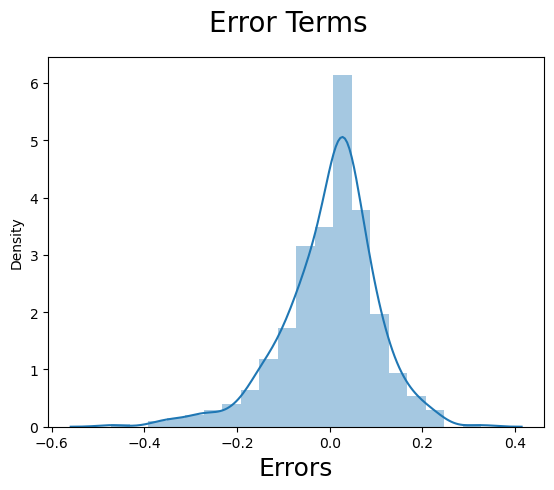

In [624]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

### Check for multicollinearity

In [625]:
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,4.68
1,temp,3.94
0,yr,2.03
5,spring,1.68
6,winter,1.32
3,sep,1.15
4,Light_snowrain,1.05


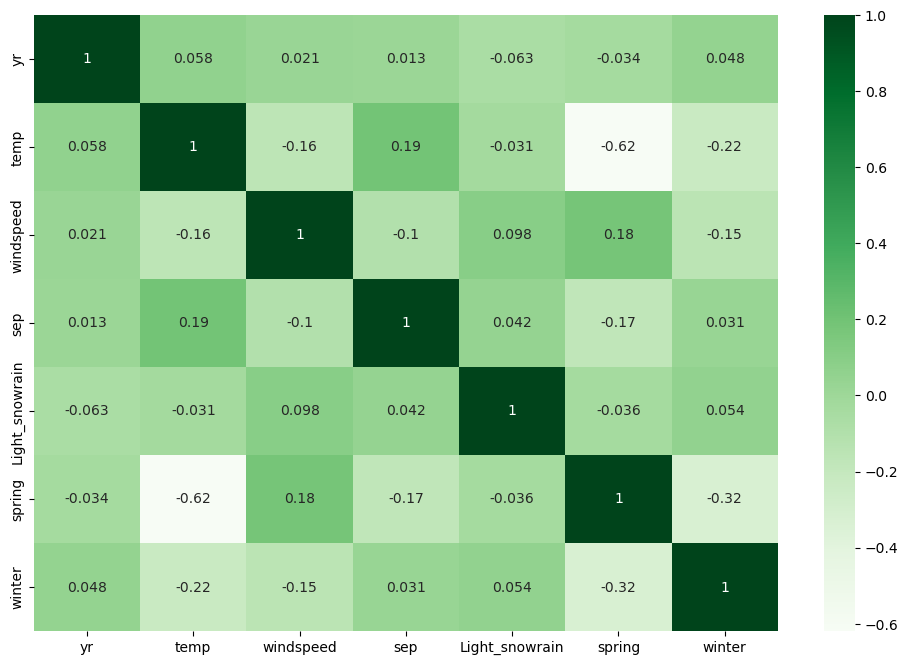

In [626]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="Greens")
plt.show()

### Check for Homoscedasticity

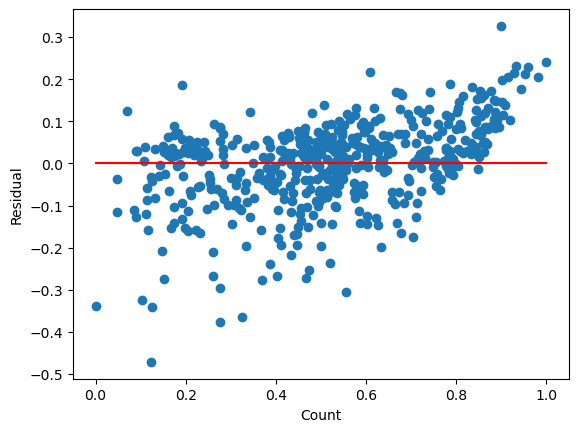

In [627]:
y_train_pred = lr_9.predict(X_train_lm_9)
residual = y_train - y_train_pred
plt.scatter(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### Adjusted R^2 for Train

In [628]:
# We already have the value of R^2 (calculated in above step)

r2=0.796

# n is number of rows in X

n = X_train.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_train.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7832233820459291

## Step 6: Making predictions using final model

In [629]:
# Applying scaling on the test dataset

bike_sharing_test[bike_sharing_cont.columns] = scaler.fit_transform(bike_sharing_test[bike_sharing_cont.columns])
bike_sharing_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,aug,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
22,0,0,0,0.000000,0.000000,0.214684,0.517945,0.060844,23,0,...,0,1,0,0,0,0,0,1,0,0
468,1,0,0,0.529437,0.534900,0.311966,0.365150,0.881481,14,0,...,1,0,0,0,0,0,0,0,1,0
553,1,0,0,0.964569,0.950552,0.415751,0.185998,0.528077,8,0,...,0,1,0,0,0,0,0,0,0,0
504,1,0,0,0.696625,0.666813,0.352259,0.539258,0.839523,20,0,...,0,1,0,0,0,0,0,0,1,0
353,0,0,1,0.384393,0.409075,0.447497,0.010221,0.411205,20,0,...,0,0,0,1,0,0,1,0,0,1


In [630]:
bike_sharing_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,aug,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.538085,0.525222,0.509481,0.364194,0.510354,15.296804,0.054795,...,0.127854,0.146119,0.173516,0.146119,0.118721,0.036530,0.324201,0.237443,0.264840,0.251142
std,0.501098,0.198967,0.465607,0.244673,0.225589,0.202460,0.212372,0.242342,8.529955,0.228100,...,0.334692,0.354034,0.379560,0.354034,0.324202,0.188034,0.469148,0.426491,0.442259,0.434663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.330429,0.337251,0.355007,0.212433,0.340474,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.544938,0.547913,0.509158,0.339573,0.517936,15.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751431,0.715419,0.650183,0.482659,0.684434,23.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [631]:
y_test = bike_sharing_test.pop('cnt')
X_test = bike_sharing_test

In [632]:
col_train = X_train_new.columns

X_test = X_test[col_train]

# Adding constant variable to test dataframe
X_test_lm_9 = sm.add_constant(X_test)

In [633]:
y_pred = lr_9.predict(X_test_lm_9)

In [634]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7772

### Adjusted R^2 score for TEST

In [635]:
# We already have the value of R^2 (calculated in above step)

r2=0.7772

# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7698085308056872

## Step 7: Model Evaluation

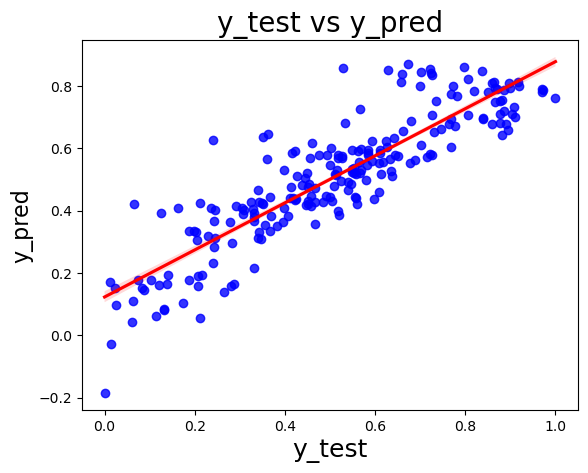

In [636]:
# Plotting a regression plot for y_test and y_pred to understand the spread
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [637]:
round(lr_9.params,4)

const             0.2276
yr                0.2346
temp              0.4374
windspeed        -0.1379
sep               0.0627
Light_snowrain   -0.2812
spring           -0.1126
winter            0.0456
dtype: float64

#### We can see that the equation of our best fitted line is:

cnt = 0.2276 + 0.2346 * year + 0.4374 * temp − 0.1379 * windspeed + 0.0627 * sep - 0.2812 * Light_snowrain - 0.1126 * spring + 0.0456 * winter

### Final Result comparison